In [8]:
import time
import pandas as pd
import matplotlib.pyplot as plt
from database_connection import connect_to_db, close_db_connection

In [14]:
def measure_query_latency(conn, query):
    """
    Measure the execution time of a query and return its latency.
    
    Args:
        conn: Database connection object.
        query (str): SQL query to execute.

    Returns:
        float: Query execution time in seconds.
        int: Number of rows fetched.
    """
    cursor = conn.cursor()

    # Start timing
    start_time = time.time()

    # Execute query
    cursor.execute(query)

    # Fetch results
    rows = cursor.fetchall()
    row_count = len(rows)

    # End timing
    end_time = time.time()
    execution_time = end_time - start_time

    cursor.close()
    return execution_time, row_count


In [15]:
def analyze_query_latencies(conn, base_query, sizes):
    """
    Analyze query latencies for different data sizes.

    Args:
        conn: Database connection object.
        base_query (str): Base SQL query (e.g., "SELECT * FROM table").
        sizes (list): List of limits or size thresholds for testing.

    Returns:
        pd.DataFrame: A DataFrame with size and latency metrics.
    """
    results = []
    
    for size in sizes:
        query = f"{base_query} LIMIT {size}"
        execution_time, row_count = measure_query_latency(conn, query)
        results.append({"size": row_count, "latency": execution_time})
    
    return pd.DataFrame(results)


In [23]:


def visualize_data_vs_latency(data):
    """
    Visualize the relationship between data size and query latency.

    Args:
        data (pd.DataFrame): DataFrame containing size and latency metrics.
    """
    plt.figure(figsize=(10, 6))
    plt.scatter(data["size"], data["latency"], color="blue", label="Latency")
    plt.title("Data Size vs. Query Latency")
    plt.xlabel("Data Size (Rows)")
    plt.ylabel("Latency (in Seconds)")
    plt.grid(True)
    plt.legend()
    plt.savefig("Data_vs_Latency.png")
    plt.tight_layout()
    plt.show()


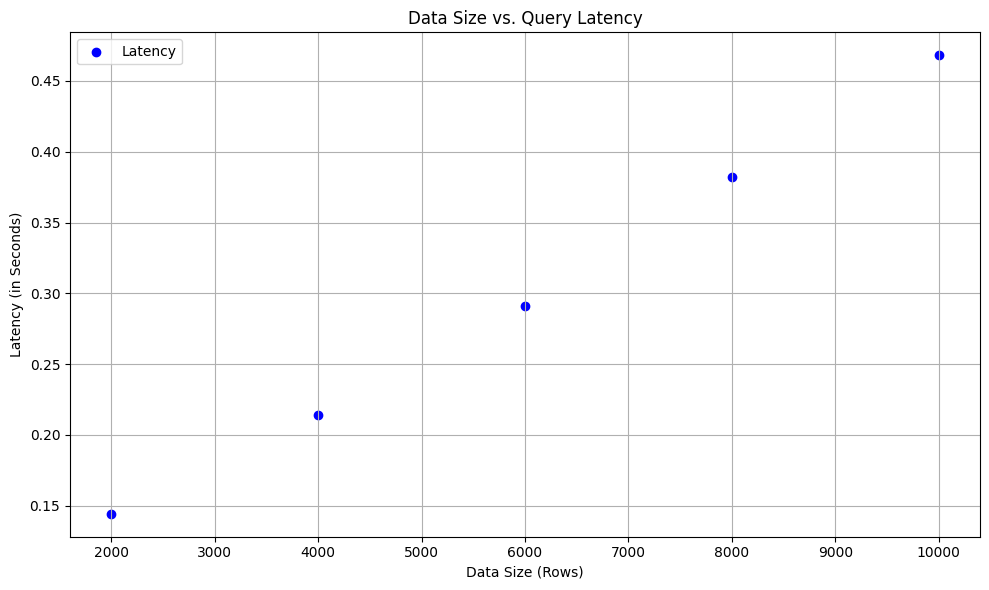

In [25]:
# Connect to the database
conn = connect_to_db()  # Use your existing function

# Base query 
base_query = "SELECT * FROM fact_sales_order"  # Adjust table name as needed

# Define different sizes to test
sizes = [2000, 4000, 6000, 8000, 10000]

# Analyze query latencies
latency_data = analyze_query_latencies(conn, base_query, sizes)

# Close the connection
conn.close()

# Visualize the results
visualize_data_vs_latency(latency_data)

## As the data size increases, the query latency is also increasing. This shows an upward trend. The growth is (roughly) a straight line, it shows the query sclaes linearly with the data size. We call it a Linear Growth. This is often a size of good query performance.